 - Name: Ziming Huang

#### A

In [1]:
#A
import numpy as np
def opt_data(filename):
    import numpy as np
    data=np.loadtxt(filename,delimiter=',',usecols=[0,2,3,4,5,6,7])
    opt_dates, spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor=(
        data[:,0],#dates
        data[:,1],#spy price
        data[:,2]/100,#rf
        data[:,3]/100,#dividend yield
        data[:,4],
        data[:,5],
        data[:,6]/365# conver tenor from days to year
    )
    return opt_dates,spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor

opt_dates,spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor=opt_data("D:/ZM-Documents/MATLAB/data/option/20150127_20.csv")

The file I choose is: "20150127_20.csv"

#### B

In [2]:
#B
dates, times, prices=np.loadtxt("D:/ZM-Documents/MATLAB/data/SPY.csv",delimiter=',',unpack=True)
T=len(np.unique(dates))
N=len(np.unique(times))
returns=np.diff(np.reshape(np.log(prices),(N,T),order='F'),axis=0)
rv=252*np.sum(returns**2,axis=0)#convert to yearly variance
# to find option trading day
dates=np.reshape(dates,(N,T),order='F')
date_indics=np.where(dates[0,:]==np.unique(opt_dates))
rv_market=rv[date_indics]#convert to yearly variance
print('Date:',int(np.unique(opt_dates)),'    RV =',float(rv_market))

Date: 20150127     RV = 0.01222700283007455


The option trading date is: 20150127

The market variance of option trading day is: 0.012227

#### C

In [3]:
#C
K2S_ratio=strike_price/spot_price
#plot K2S_ratio against put price
import matplotlib.pyplot as plt
with plt.style.context("ggplot"): 
    plt.rcParams['figure.dpi']=300
    #plt.figure(figsize=(6,3))
    data1= K2S_ratio
    data2= put_price
    plt.scatter(data1,data2,color='tab:blue',linewidths=0.01)
    plt.axvline(x=1,color='tab:red')
    plt.xlabel('K-to-S0 Ratio',fontsize=10)
    plt.ylabel('Put Option Price',fontsize=10)
    plt.title('Relationship between K-to-S0 Ratio and Put Option Price ',fontsize=10)

The figure above indicates that the put option price increases with the strike-to-underlying ratio increases. According to the pricing function of put option: 
$$put=max{\{K-S_T,0\}}$$  
The larger the differences between strike K and underlying price $S_0$, the put option will worth more. This is consistent with the strike-to-underlying ratio increases: the larger the ratio, the difference between strike price and underlying price will increase, thus increasing the put option price.

#### D

In [4]:
#D
def BS_put(K,S,T,r,q,sigma):
    from scipy.stats import norm
    #d1=(np.log(S/np.array(K))+(r-q)*T)/(sigma*np.sqrt(T))+sigma*np.sqrt(T)/2
    d1=(np.log(S/np.array(K))+(r-q+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    put=K*np.exp(-r*T)*norm.cdf(-d2)-S*np.exp(-q*T)*norm.cdf(-d1)
    return put

#### E

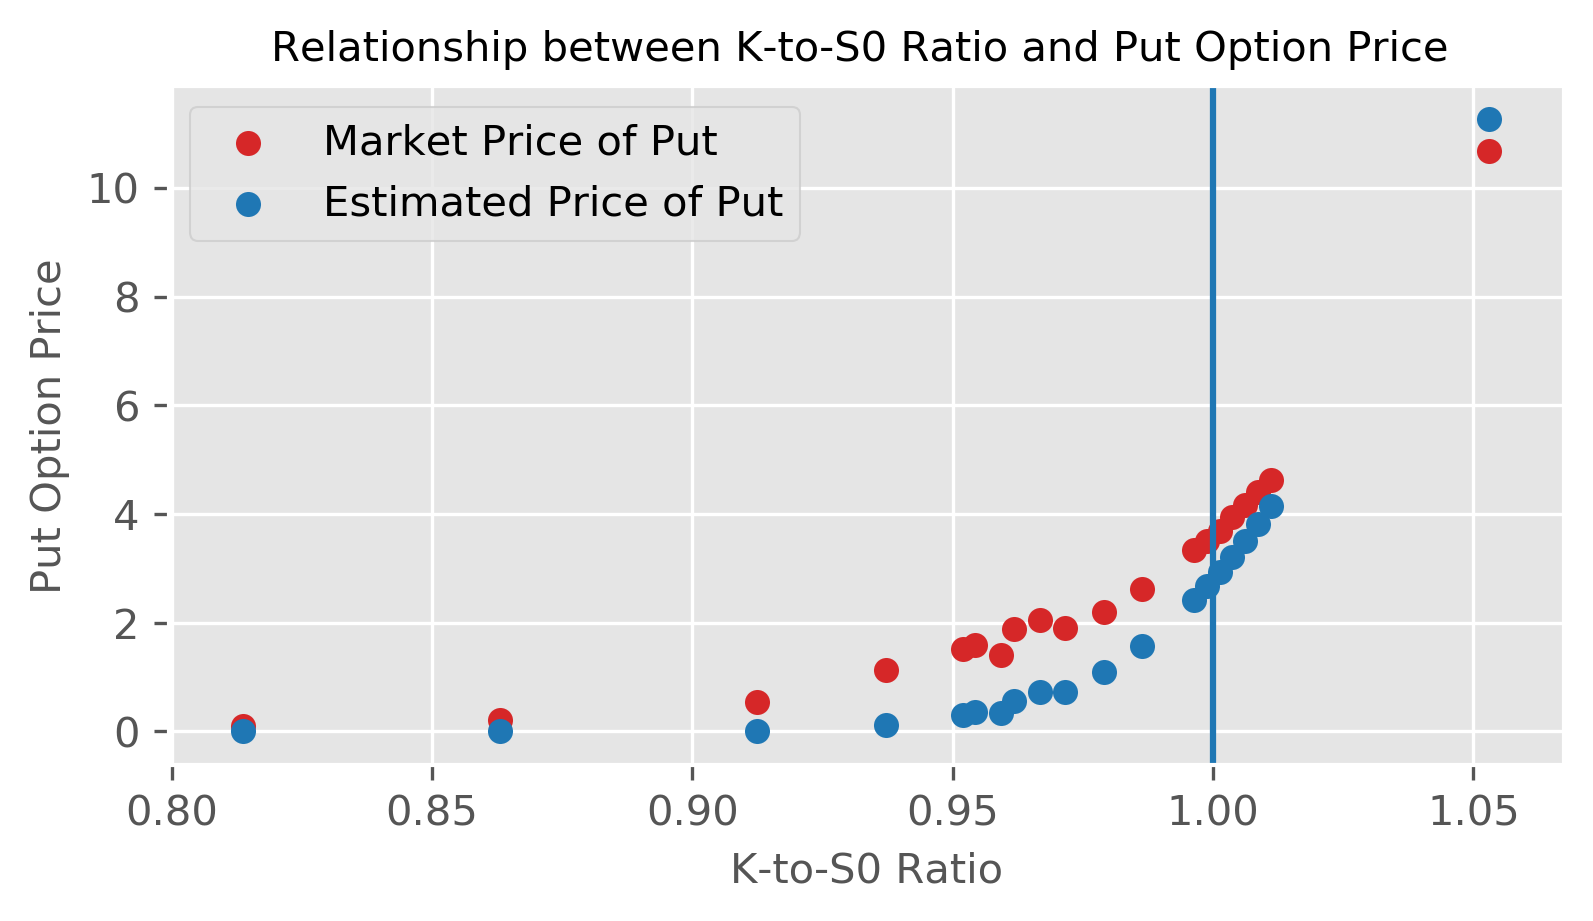

In [5]:
#E
opt_dates,spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor=opt_data("D:/ZM-Documents/MATLAB/data/option/20150127_20.csv")
put_model=BS_put(strike_price,spot_price,tenor,interest_rate,dividend_yield,np.sqrt(rv_market))

with plt.style.context("ggplot"): 
    plt.rcParams['figure.figsize']=(6,3)
    plt.rcParams['figure.dpi']=300
    #plt.figure(figsize=(12,5))
    data1= K2S_ratio
    data2= put_price
    data3= put_model
    line1=plt.scatter(data1,data2,color='tab:red',linewidths=0.01)
    line2=plt.scatter(data1,data3,color='tab:blue',linewidths=0.01)
    plt.axvline(x=1,color='tab:blue')
    plt.xlabel('K-to-S0 Ratio',fontsize=10)
    plt.ylabel('Put Option Price',fontsize=10)
    plt.title('Relationship between K-to-S0 Ratio and Put Option Price ',fontsize=10)
    line1.set_label('Market Price of Put')
    line2.set_label('Estimated Price of Put')
    plt.legend()

The figure above indicates that the B-S pricing model works well when the option is in-the-money (strike-to-underlying ratio is larger than 1), especial for the case of deep-in-the-money (strike-to-underlying ratio is much larger than 1).

When the put option is out-of-money, the B-S pricing model gives a lower option price than the market, which means the option may be overvalue by market when it is out-of-money (if the investors believe the B-S gives the true value of options). This figure indicates possible arbitrage strategy, that is short selling the out-of-money-put options.

#### F

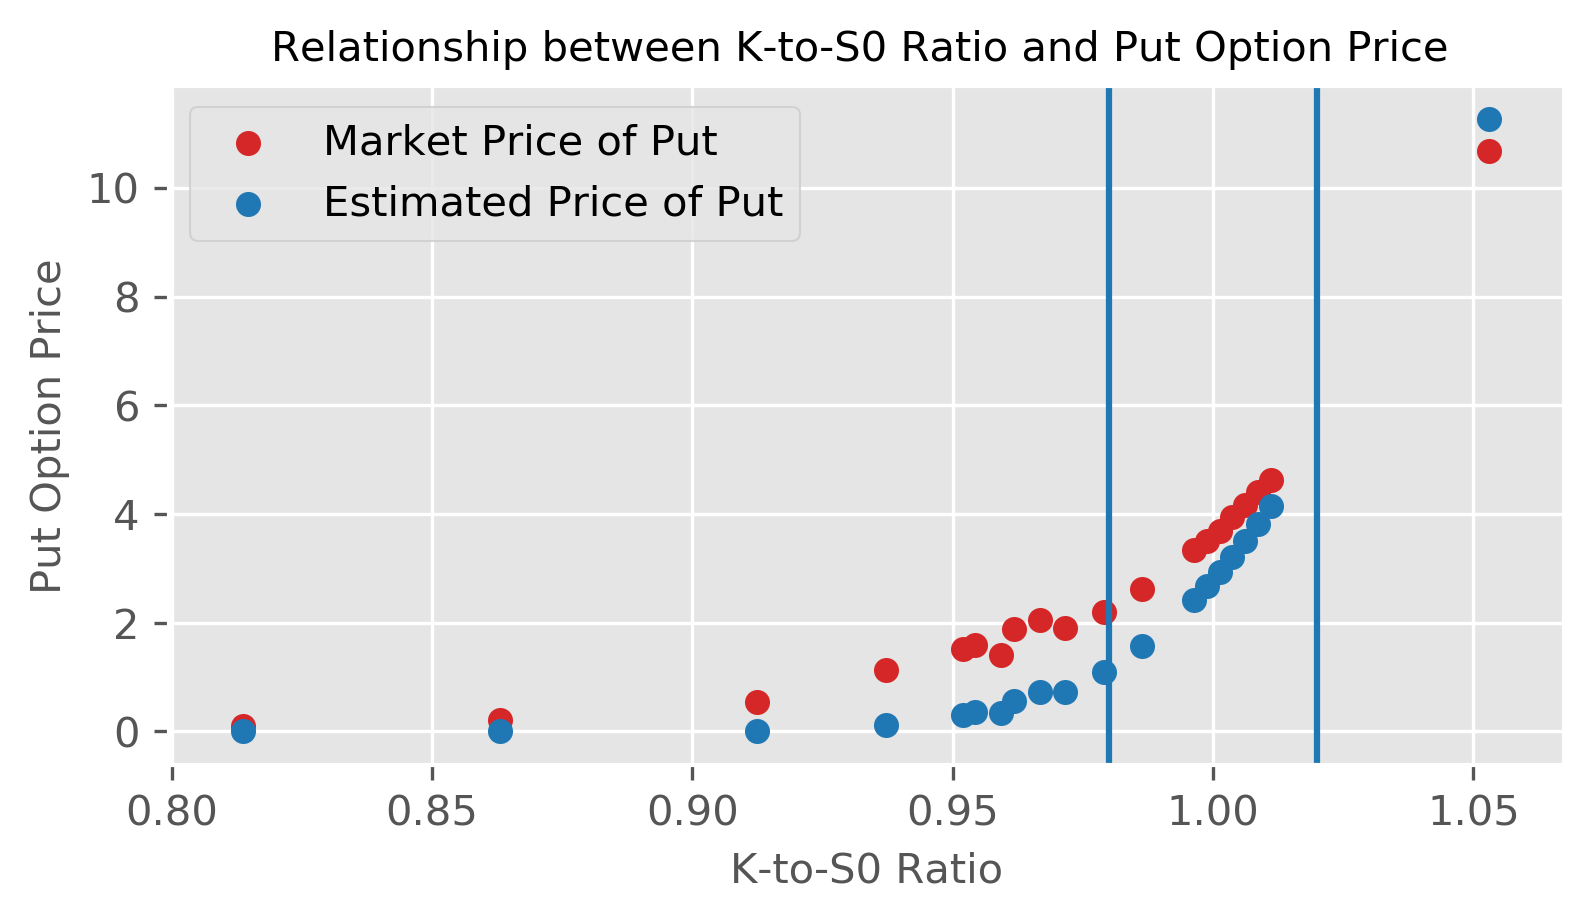

In [6]:
#F
with plt.style.context("ggplot"): 
    plt.rcParams['figure.dpi']=300
    plt.rcParams['figure.figsize']=(6,3)
    #plt.figure(figsize=(10,4))
    data1= K2S_ratio
    data2= put_price
    data3= put_model
    line1=plt.scatter(data1,data2,color='tab:red',linewidths=0.01)
    line2=plt.scatter(data1,data3,color='tab:blue',linewidths=0.01)
    plt.axvline(x=0.98,color='tab:blue')
    plt.axvline(x=1.02,color='tab:blue')
    plt.xlabel('K-to-S0 Ratio',fontsize=10)
    plt.ylabel('Put Option Price',fontsize=10)
    plt.title('Relationship between K-to-S0 Ratio and Put Option Price ',fontsize=10)
    line1.set_label('Market Price of Put')
    line2.set_label('Estimated Price of Put')
    plt.legend()

According to the figure, the B-S model option prices is closer to the market option price when $\frac{K}{S_0} \in(0.98, 1.02)$, which indicates this model may price option well when the option is nearly at-the-money;

The B-S model option prices is lower than the market option price when $\frac{K}{S_0} \in(0.85,0.98 )$, which indicates this model may underprice option when the option is out-the-money.

For option far out-of-money ($\frac{K}{S_0}$ is near 0), the B-S estimated price is close to the market price, which is not consistent to the general rule.

#### G

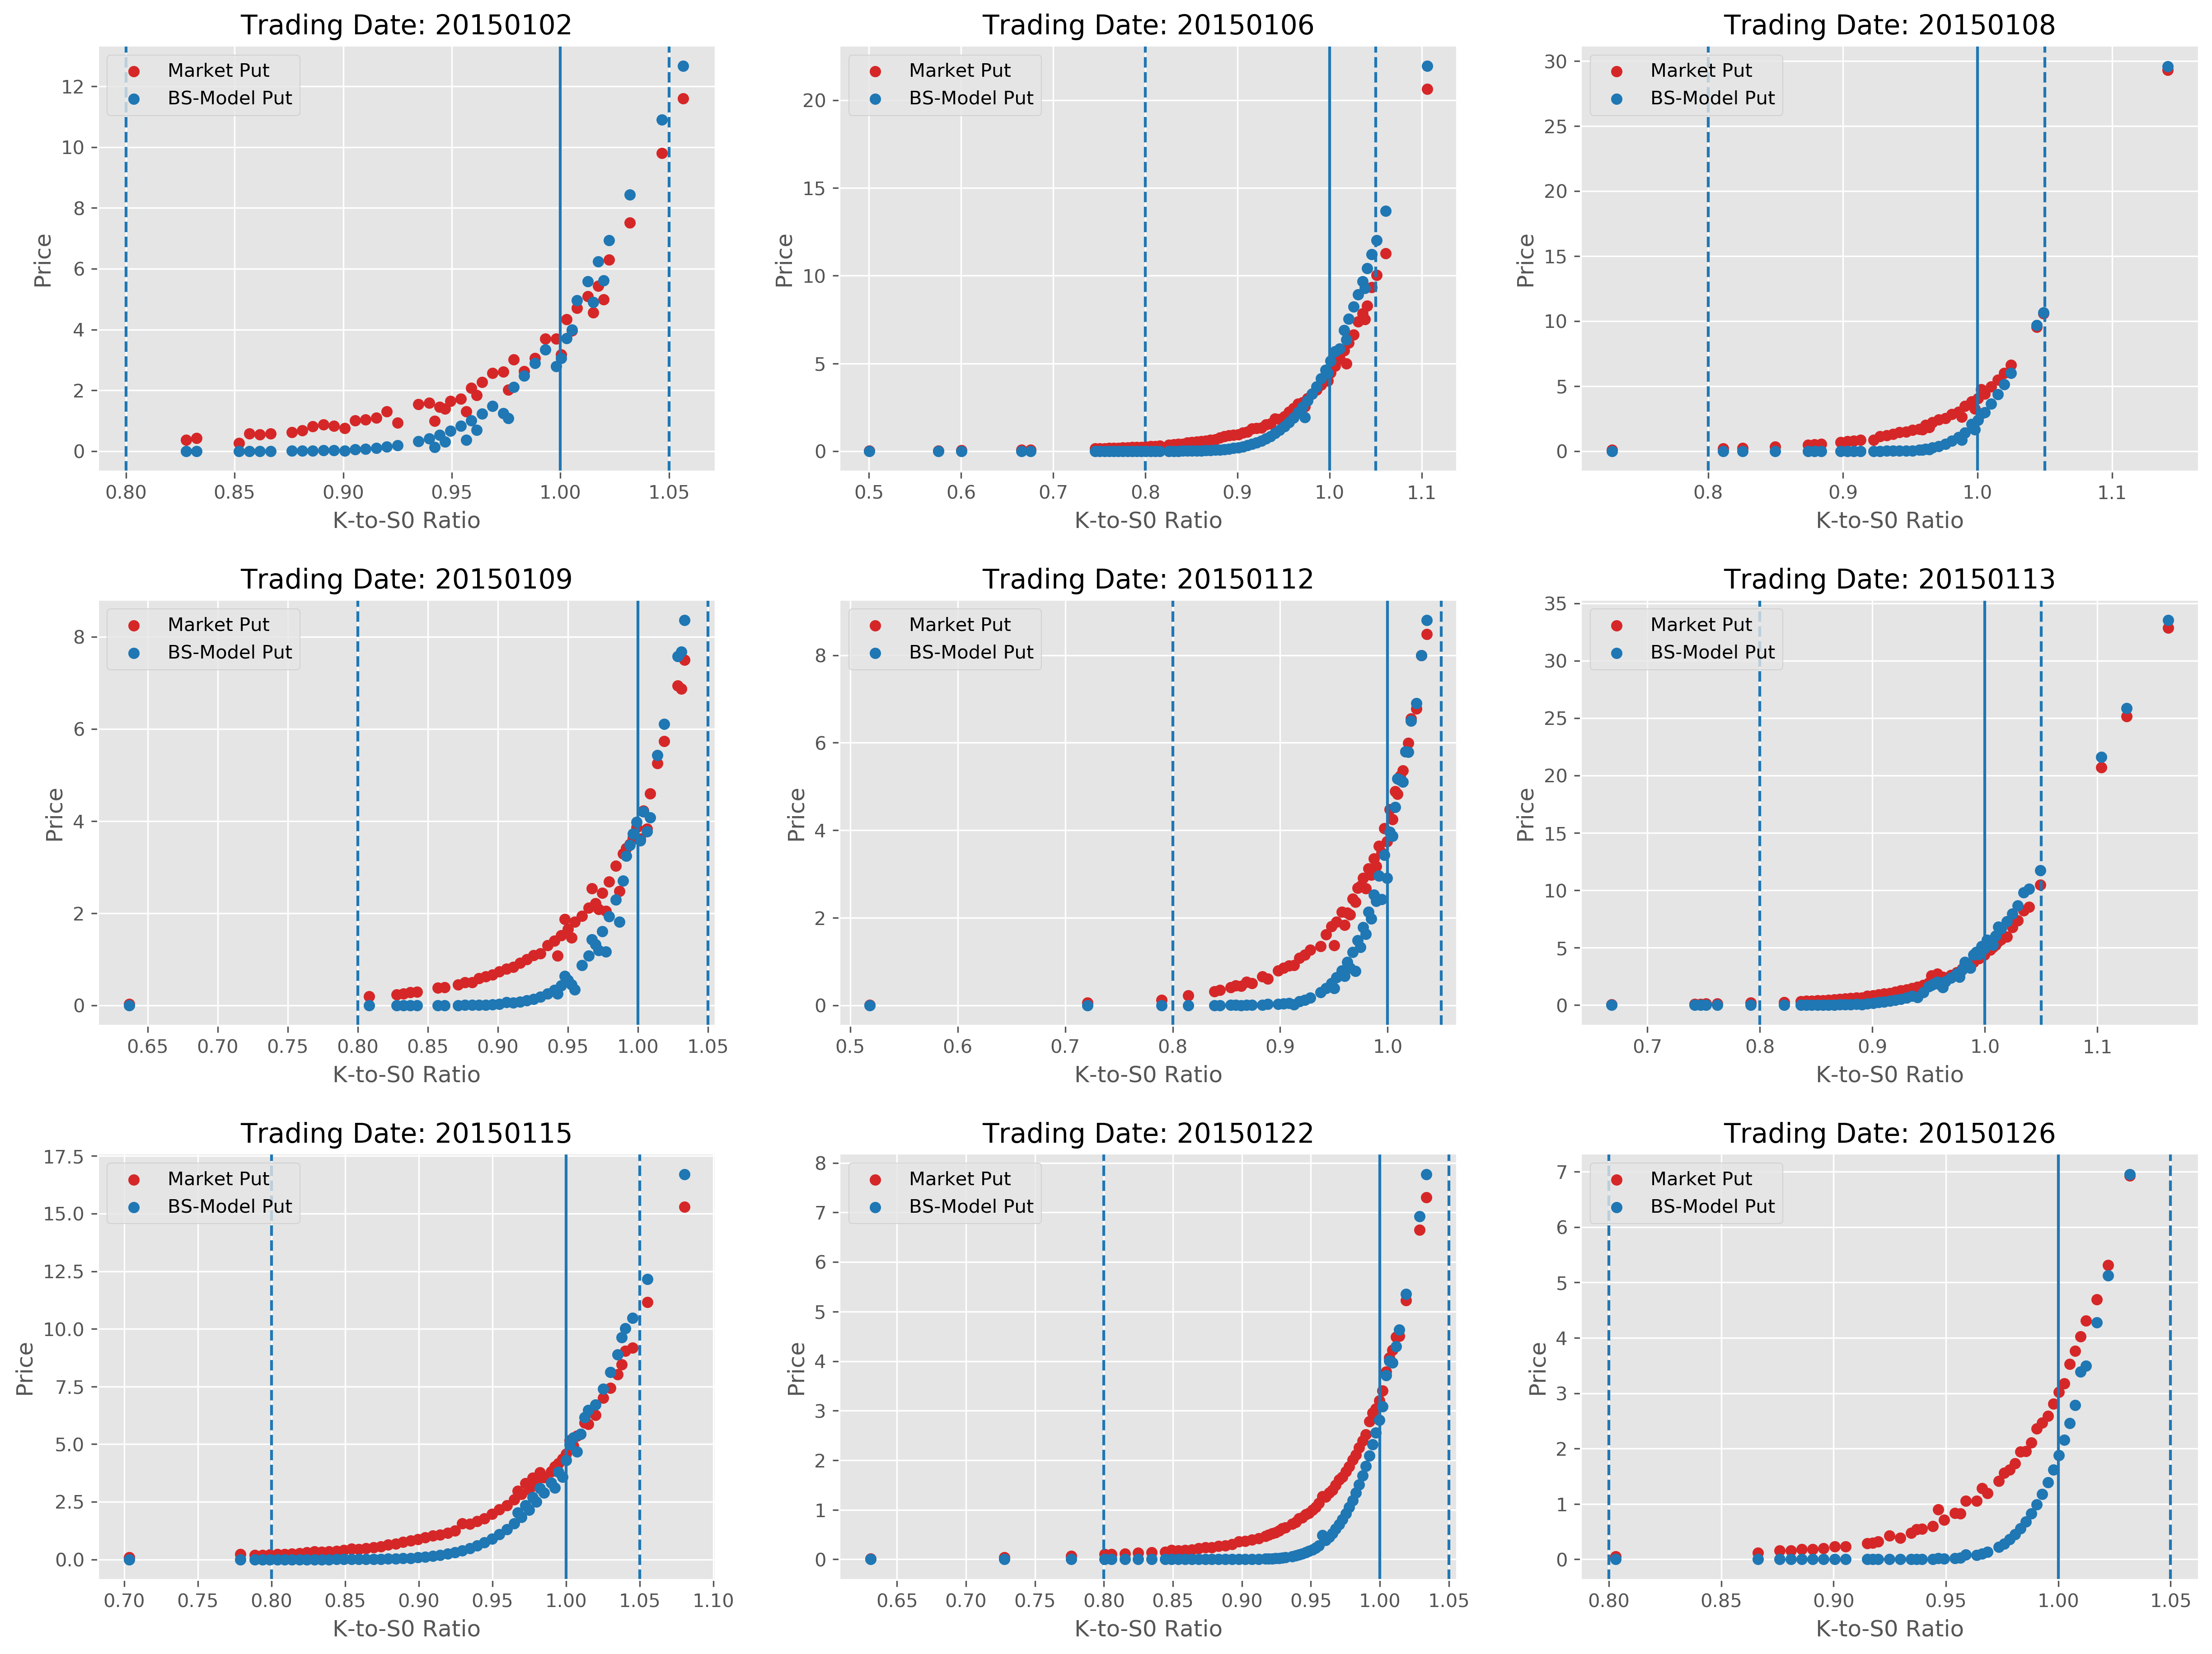

In [7]:
#G
names=['20150102_48','20150106_72','20150108_41','20150109_53','20150112_55','20150113_64','20150115_66','20150122_66','20150126_46']
put_model=[]
put_market=[]
rv_market=[]
k2s=[]
for name in names: 
    opt_dates, spot_price, interest_rate, dividend_yield, put_price, strike_price, tenor=opt_data('D:/ZM-Documents/MATLAB/data/option/'+name+'.csv')
    rv_market=rv[np.where(dates[0,:]==np.unique(opt_dates))]
    put_model.append(BS_put(strike_price,spot_price,tenor,interest_rate,dividend_yield,np.sqrt(rv_market)))
    put_market.append(put_price)
    k2s.append(strike_price/spot_price)

#k2s=np.array(k2s)
#put_model=np.array(put_model)
#plot
with plt.style.context("ggplot"):
    plt.rcParams['figure.dpi']=300
    fig, axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
    plt.subplots_adjust(hspace=0.3)
    for i in range(0,3):
        for j in range(0,3):
            axes[i,j].scatter(k2s[3*i+j],put_market[3*i+j],linewidths='0.001',color='tab:red',label='Market Put')        
            axes[i,j].scatter(k2s[3*i+j],put_model[3*i+j],linewidths='0.001',color='tab:blue',label='BS-Model Put')
            axes[i,j].axvline(x=0.8,color='tab:blue',linestyle='--')
            axes[i,j].axvline(x=1.0,color='tab:blue')
            axes[i,j].axvline(x=1.05,color='tab:blue',ls='--')
            axes[i,j].legend(loc='upper left')
            axes[i,j].set_xlabel('K-to-S0 Ratio')
            axes[i,j].set_ylabel('Price')
            axes[i,j].set_title('Trading Date: '+names[3*i+j][0:8]) 


According to the figure, the B-S model option prices is closer to the market option price when $\frac{K}{S_0} \in(1.0, 1.05)$, which indicates this model may price option well when the option is nearly at-the-money;

The B-S model option prices is lower than the market option price when $\frac{K}{S_0} \in(0.8, 1.0 )$, which indicates this model may underprice option when the option is out-the-money.

For option far out-of-money ($\frac{K}{S_0}$ is near 0), the B-S estimated price is close to the market price, which is not consistent to the general rule.

#### H

According to the figures, when $\frac{K}{S_0} \in(0.80, 1.0)$, the prices of put option estimated by the B-S model is lower than the market prices for most of our option price samples. If the B-S model corresctly prices the put options, then selling the put options when it is a little out-of-money ( $\frac{K}{S_0} \in(0.80, 1.0)$) would be a arbitrage investment strategy and could make some money for company.